# Constraint Satisfaction Problems

## Introduction
Constraints exist in most areas of life, which are natural means for people to express problems in their lives, for example, if you want to enter the cinema you have to pay for the entry ticket so we can call the available of ticket is the constraint to enter the cinema, and if you want to eat ice cream you have to pay for it here the payment is the constraint for getting ice cream, and a lot of constraints and restrictions imposed in order to achieve the goal, when we talk about technology there are also mechanisms to model the constraints or conditions that are required to achieve or satisfy a particular goal, so the (Constraint Satisfaction Techniques) or (Constraint Satisfaction Problems) (CSP) found, they are solved through search algorithms that fall under the artificial intelligence, examples of these problems:
- Solving Sudoku
- Draw a circle within the box
- N-Queens problem

A constraint or condition is a logical relationship between two or more variables, and the condition connects objects without accurately determining their location, and when moving any of them we remain to maintain the relationship between these variables, for example: "Box within a circle or vice versa"

In this tutorial we will learn more about Constraint Satisfaction Problems, and how to solve it using search algorithms using python.

## Objectives
- Understand the definition and concept of CSP
- Understand and explain one common problem that can be solved within CSP concept
- Learn about CSP model and its concept
- Learn about the algorithms which will be used to solve the problem
- Implement the algorithms to solve the problem
- Test the performance of the algorithms on several samples

## Main Concepts of CSP
#### CSP model of the Problem
        
        o Variables     X = {X1,X2,......,Xn} the set of variables
        
        o Domains       D = {D1,D2,......,Dn} the set of their respective domains of values
        
        o Constraints   C = {C1,C2,......,Cn} the set of cosntraints 
        
        o Relations     R = {R1,R2,......,Rn} the set of relations which control the variables 
        
        o Solution      S = {S1,S2,......,Sn} the set solutions


#### Problem formulation
        
        o Initial state : the initial state of the problem to be solved
        
        o Actions : the actions and procedures to be taken to solve the problem, assign a value to an unassigned variable provided that it does not violate a constraint
        
        o State space : the state space for all states obtained  to solve the problem
        
        o Goal test : the current problem is completed and solved


#### Constraint Satisfaction Problems
Mathematical problems defined as a set of objects whose state must satisfy a number of constraints or conditions.
    
#### Heuristics for CSPs
Chart or planner which describes the state changing after every action

#### Explanation of algorithms
In this tutorial we will solve the CSP using 3 well-known algorithms:
- Arc Consistency AC-3
- Backtracking with AC-3
- Forward Checking

we will explain every algorithm, then we will implement it to solve the problem, and finally we will test its performance.

#### Comparison of algorithm’s performance
Then we will make a comparison between 3 algorithms and see the best case to implement every algorithm

## N-Queens Problem
N-Queens problem is to place or locate (n) numbers of queens (queen in chessboard) in such a manner on an n x n chessboard that no queen can attack any another queen through being in the same row, column or diagonal.

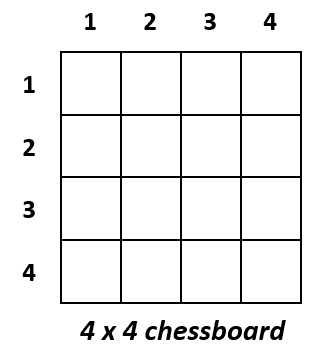

The problem will be solved when the n-queens placed with satisfying all the constraints

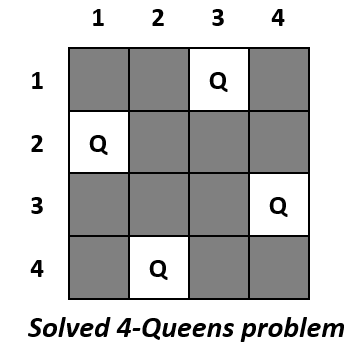

In [1]:
chessboardEmpty = [[0, 0, 0, 0], [0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0]]

In [2]:
"function to print chessboard"
def printChessboard(board,N): 
    for x in range(N):
        for y in range(N):
            print(board[x][y], end = " ")
        print() 

In [3]:
printChessboard(chessboardEmpty,4)

0 0 0 0 
0 0 0 0 
0 0 0 0 
0 0 0 0 


In [4]:
chessboardSolved = [[0, 0, 1, 0], [1, 0, 0, 0],[0, 0, 0, 1],[0, 1, 0, 0]]

In [5]:
printChessboard(chessboardSolved,4)

0 0 1 0 
1 0 0 0 
0 0 0 1 
0 1 0 0 


## Arc Consistancy AC-3
#### Explanation
AC-3 algorithm is used as a preprocess step, where AC-3 detects conflicts that you will have in attributions, during the implementation, and deletes them.
By cutting the domains of the variables in the CSP. So when two variables share a restriction we say that there's an arc between both. You say that the arc between A and B is consistent if:
- A->B is consistent: foreach value a that A can take there's a value b that B can take respecting the restriction.
- B->A is consistent: foreach value b that B can take there's a value a that A can take respecting the restriction.

#### Implementation

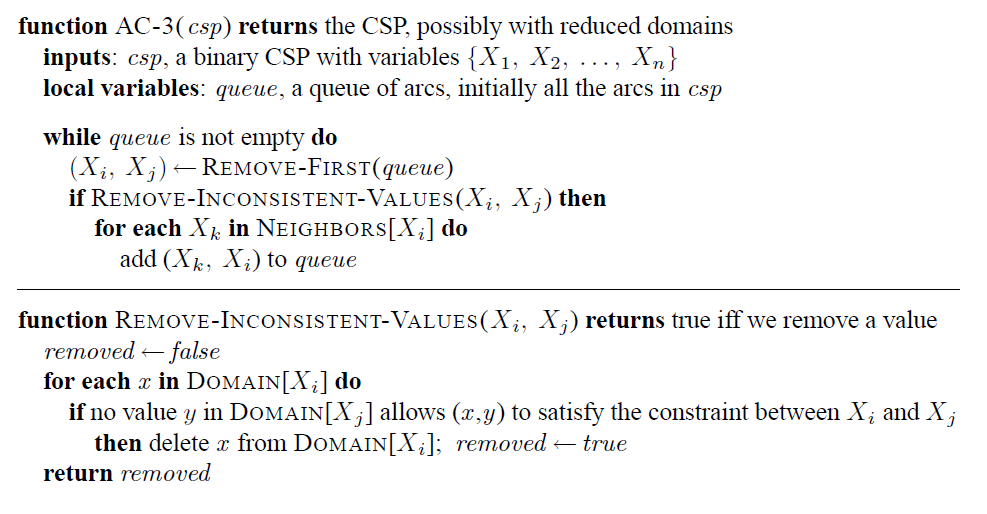

## Backtracking with AC-3
#### Explanation
The main concept of Backtrack algorithm is to solving problems recursively by trying to build a solution incrementally, one piece at a time

#### Implementation
to implement the algorithm, we will do the following procedures: 
1. Start in at the first left column
2. If all queens are placed return true
3. Try all rows in the current column. 
   Do the following procedures for every tried row.
    a. If the queen can be placed safely in this row then mark this [row, column] as part of the solution and recursively check if placing queen here leads to a solution.
    b. If placing the queen in [row, column] leads to a solution then return true.
    c. If placing queen doesn't lead to a solution then unmark this [row, column] (Backtrack) and go to step (a) to try other rows.
3. If all rows have been tried and nothing worked, return false to trigger backtracking.

#### Applying the algorithm on the problem

In [6]:
# The number of N which could be 4,8,16,....
# Queen_Number = 4

In [7]:
def isAvliable(chessboard, row, col, Queen_Number):
  
    # Check the row on right side
    for x in range(col):
        if chessboard[row][x] == 1:
            return False
  
    # Check upper diagonal on left side
    for x, y in zip(range(row, -1, -1), 
                    range(col, -1, -1)):
        if chessboard[x][y] == 1:
            return False
  
    # Check lower diagonal on right side
    for x, y in zip(range(row, Queen_Number, 1), 
                    range(col, -1, -1)):
        if chessboard[x][y] == 1:
            return False
  
    return True

In [8]:
# Simple Bactrack function to solve N-Queen
def FindSolution(chessboard, col, Queen_Number):
      
    # If all queens are placed then return true
    if col >= Queen_Number:
        return True
  
    # Else it will begin placing this queen in all rows one by one
    for x in range(Queen_Number):
  
        if isAvliable(chessboard, x, col , Queen_Number):
              
            # Place this queen in chessboard[x][col]
            chessboard[x][col] = 1
  
            # recur to place rest of the queens
            if FindSolution(chessboard, col + 1, Queen_Number) == True:
                return True
  
            # If placing queen in chessboard[x][col
            # doesn't lead to a solution, then
            # queen from chessboard[x][col]
            chessboard[x][col] = 0
  
    # if the queen can not be placed in any row in
    # this colum col then return false
    return False

###### The following function is to print if no solution found 

In [9]:
def findSolution_N_Queen(chessboard1,Queen_Number):
    if FindSolution(chessboard1, 0 , Queen_Number) == False:
        print ("Solution does not exist")
        return False
  
    printChessboard(chessboard1,Queen_Number)
    return True

#### Lets take a try now!

In [10]:
Queen_Number = 4
chessboard = [ [0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0] ]
findSolution_N_Queen(chessboard, Queen_Number)

0 0 1 0 
1 0 0 0 
0 0 0 1 
0 1 0 0 


True

 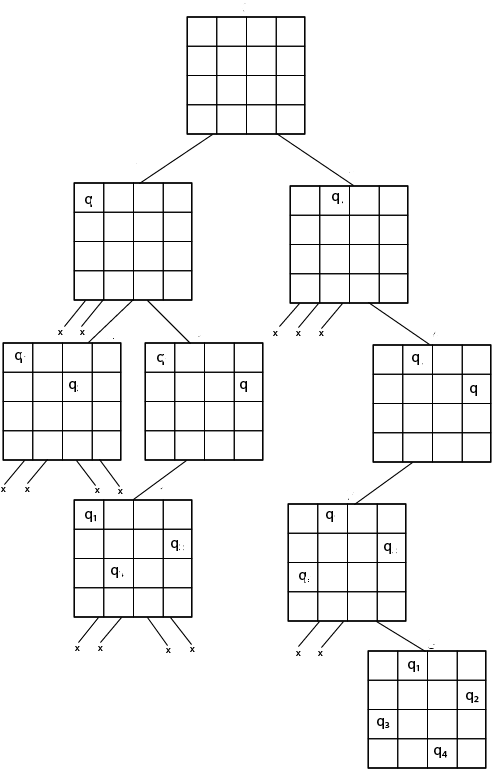

#### Testing the algorithm on several sample
now lets try to solve 8-queens problem!

In [13]:
Queen_Number = 8
chessboard = [[0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0]]
findSolution_N_Queen(chessboard, Queen_Number)

1 0 0 0 0 0 0 0 
0 0 0 0 0 0 1 0 
0 0 0 0 1 0 0 0 
0 0 0 0 0 0 0 1 
0 1 0 0 0 0 0 0 
0 0 0 1 0 0 0 0 
0 0 0 0 0 1 0 0 
0 0 1 0 0 0 0 0 


True

Now lets try to solve 16-queens problem!

In [12]:
Queen_Number = 16
chessboard = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
findSolution_N_Queen(chessboard, Queen_Number)

1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 
0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 
0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 
0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 
0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 
0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 


True

# Forward Checking
#### Explanation
Forward checking is used in backtracking search and is useful for detecting inevitable failures early, and it's main concept is to check the next state in every time.

#### Implementation
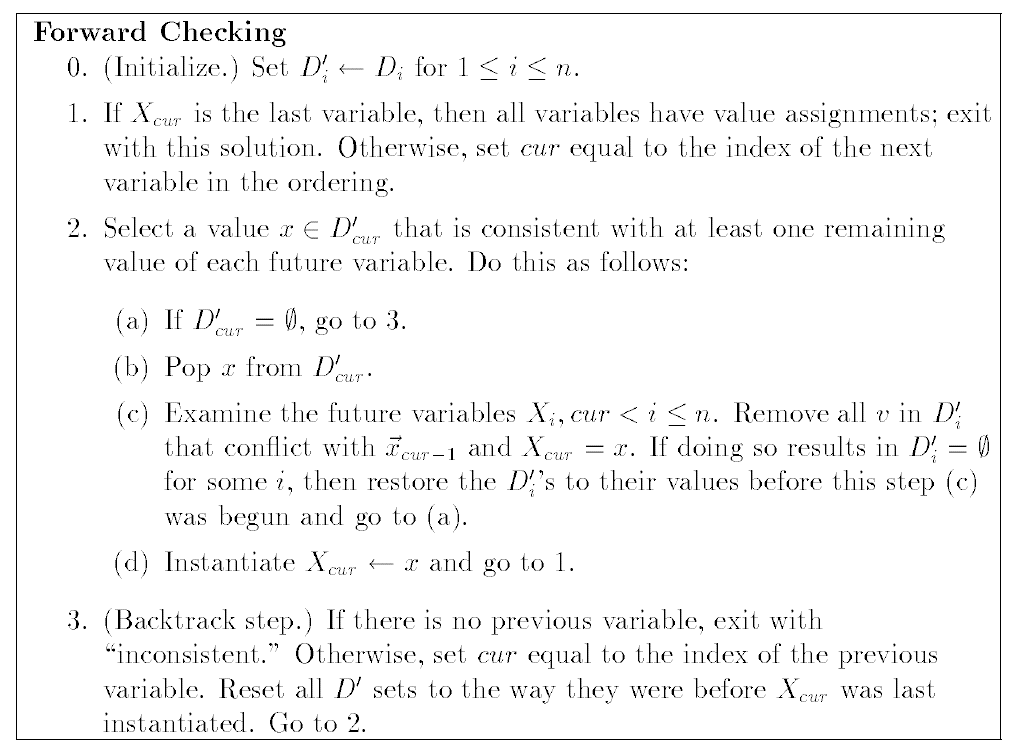

# Comparison of algorithm’s performance
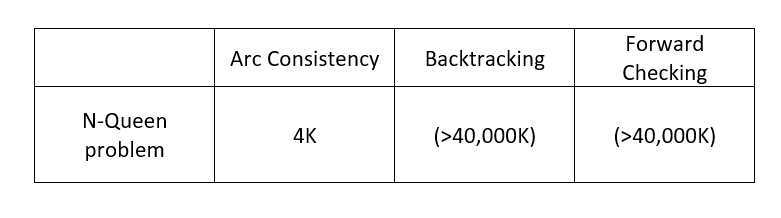

## References and resources

1. https://freecontent.manning.com/constraint-satisfaction-problems-in-python/
2. https://en.wikipedia.org/wiki/Constraint_satisfaction_problem#:~:text=Constraint%20satisfaction%20problems%20(CSPs)%20are,number%20of%20constraints%20or%20limitations.&text=CSPs%20often%20exhibit%20high%20complexity,solved%20in%20a%20reasonable%20time.
3. https://www.youtube.com/watch?v=lCrHYT_EhDs
4. https://www.geeksforgeeks.org/backtracking-algorithms/
5. https://www.geeksforgeeks.org/n-queen-problem-backtracking-3/
6. https://en.wikipedia.org/wiki/AC-3_algorithm
7. https://www.sciencedirect.com/topics/computer-science/arc-consistency
8. https://www.sciencedirect.com/topics/computer-science/arc-consistency-algorithm
9. https://link.springer.com/article/10.1023/A:1011096320004
10. https://github.com/BartekH/CSP
11. https://developers.google.com/optimization/cp/queens
12. https://www.youtube.com/watch?v=-47nFq_9_zk